Histogram (Color)

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
base_path = "/Users/blanchepenafiel/Desktop/Dataset"
train_path= os.path.join(base_path, "Train")
cat_path = os.path.join(base_path, "Train", "Cat")
dog_path = os.path.join(base_path, "Train", "Dog")

Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9


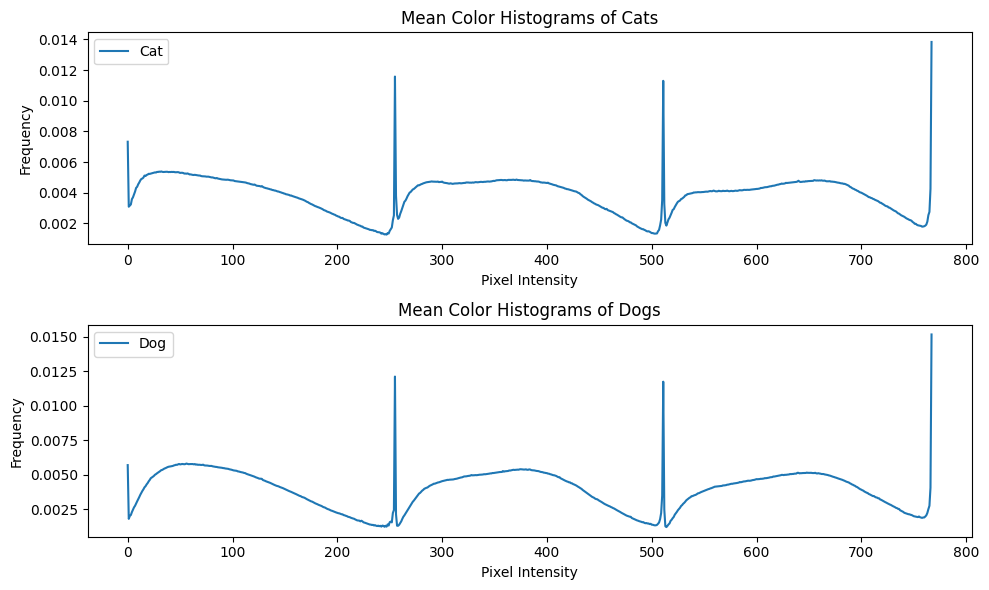

In [4]:


# Function to compute color histograms for images in a given folder
def compute_color_histograms(folder_path):
    histograms = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is None:
                print(f"Failed to read image: {image_path}")
                continue
            # Compute histogram for each color channel separately
            hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
            hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
            hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])
            # Normalize histograms
            hist_b /= np.sum(hist_b)
            hist_g /= np.sum(hist_g)
            hist_r /= np.sum(hist_r)
            # Concatenate histograms into a single feature vector
            histogram = np.concatenate([hist_b, hist_g, hist_r])
            histograms.append(histogram)
    return np.array(histograms)

# Compute color histograms for cat images
cat_histograms = compute_color_histograms(cat_path)
# Compute color histograms for dog images
dog_histograms = compute_color_histograms(dog_path)

# Plot histograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.mean(cat_histograms, axis=0), label='Cat')
plt.title('Mean Color Histograms of Cats')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.mean(dog_histograms, axis=0), label='Dog')
plt.title('Mean Color Histograms of Dogs')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
